In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [501]:
#DataFrame craeted and csv file load
gs = pd.read_csv("C:/Users/Kennedy/Desktop/Pandas/GSW.csv")
#renaming unnamed columns
gs.rename(columns={"Unnamed: 5":"where", "Unnamed: 7":"result", "Unnamed: 8":"PlayTime(OT)"}, inplace=True)

In [502]:
#deleting empty/unncessary columns
del(gs["Unnamed: 3"])
del(gs["Unnamed: 4"])
del(gs["Notes"])

In [503]:
gs['Date']=pd.to_datetime(gs['Date'], format='%a %b %d %Y')

In [504]:
#Replace Nan and undesirable value names
gs["where"].fillna('home', inplace=True)
gs["PlayTime(OT)"].fillna('NoOT', inplace=True)
gs["where"].replace('@', 'away', inplace=True)

In [505]:
#change from default index
gs.set_index("G", inplace=True)

In [506]:
gs["g_range"]=abs(gs.Tm-gs.Opp)

In [507]:
gs['wint']=(gs['result'] == 'W').astype(int)#creates an integer 1 if column value matches condition
gs['Losst']=(gs['result'] == 'L').astype(int)#creates an integer 1 if column value matches condition

gsc=gs.drop(['Losst', 'wint'], axis=1)

In [508]:
#all measures accross DF
print("Season Data")
gs[['Tm','Opp', 'W', 'L', 'g_range']].describe()

Season Data


,Tm,Opp,W,L,g_range
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,118.466667,117.960000,19.040000,18.960000,11.760000
std,10.501394,11.064235,11.410569,10.426629,8.981723
min,83.000000,91.000000,1.000000,0.000000,1.000000
25%,112.500000,110.500000,9.500000,10.000000,6.000000
50%,119.000000,118.000000,20.000000,18.000000,9.000000
75%,124.000000,125.500000,28.500000,28.000000,14.000000
max,144.000000,143.000000,39.000000,36.000000,45.000000


In [509]:
#Win Ratio
rat=gs['result'][gs['result']=='W'].count()/gs['result'].count()
print(f"GSW win ratio for season: {rat}")

GSW win ratio for season: 0.52


In [510]:
#seasons score ranges
print("Season's Score Ranges")
print(f"Average Range = {gs['g_range'].mean()}")
print('Highest Score Ranges:')
gsc.sort_values('g_range', ascending=False).head()

Season's Score Ranges
Average Range = 11.76
Highest Score Ranges:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
18,2022-11-21,8:00p,away,New Orleans Pelicans,L,NoOT,83,128,8,10,L 1,45
32,2022-12-20,7:30p,away,New York Knicks,L,NoOT,94,132,15,17,L 1,38
14,2022-11-14,10:00p,home,San Antonio Spurs,W,NoOT,132,95,6,8,W 1,37
42,2023-01-13,7:30p,away,San Antonio Spurs,W,NoOT,144,113,21,21,W 1,31
33,2022-12-21,7:30p,away,Brooklyn Nets,L,NoOT,113,143,15,18,L 2,30


In [511]:
#Shortest Score Range
print('Shortest Score Ranges:')
gsc.sort_values('g_range', ascending=True).head()

Shortest Score Ranges:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
26,2022-12-07,9:00p,away,Utah Jazz,L,NoOT,123,124,13,13,L 2,1
9,2022-11-03,7:00p,away,Orlando Magic,L,NoOT,129,130,3,6,L 4,1
38,2023-01-02,10:00p,home,Atlanta Hawks,W,2OT,143,141,20,18,W 5,2
74,2023-03-22,7:30p,away,Dallas Mavericks,W,NoOT,127,125,38,36,W 2,2
48,2023-01-25,10:00p,home,Memphis Grizzlies,W,NoOT,122,120,24,24,W 1,2


In [512]:
#GSW Lead
print("GOLDEN STATE")
print('GSW Biggest Leads:')
gsc[gsc['result']=="W"].sort_values('g_range', ascending=False).head()

GOLDEN STATE
GSW Biggest Leads:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
14,2022-11-14,10:00p,home,San Antonio Spurs,W,NoOT,132,95,6,8,W 1,37
42,2023-01-13,7:30p,away,San Antonio Spurs,W,NoOT,144,113,21,21,W 1,31
54,2023-02-06,10:00p,home,Oklahoma City Thunder,W,NoOT,141,114,28,26,W 2,27
63,2023-03-02,10:00p,home,Los Angeles Clippers,W,NoOT,115,91,33,30,W 4,24
21,2022-11-27,3:30p,away,Minnesota Timberwolves,W,NoOT,137,114,11,10,W 3,23


In [513]:
print('GSW Smallest Leads:')
gsc[gsc['result']=="W"].sort_values('g_range', ascending=True).head()

GSW Smallest Leads:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
38,2023-01-02,10:00p,home,Atlanta Hawks,W,2OT,143,141,20,18,W 5,2
48,2023-01-25,10:00p,home,Memphis Grizzlies,W,NoOT,122,120,24,24,W 1,2
74,2023-03-22,7:30p,away,Dallas Mavericks,W,NoOT,127,125,38,36,W 2,2
11,2022-11-07,10:00p,home,Sacramento Kings,W,NoOT,116,113,4,7,W 1,3
3,2022-10-23,8:30p,home,Sacramento Kings,W,NoOT,130,125,2,1,W 1,5


In [514]:
#GSW scores
print("GSW Highest Scores:")
print(f"best score is {gs.Tm.max()} and least score is {gs.Tm.min()}" )
gsc.sort_values('Tm', ascending=False).head()

GSW Highest Scores:
best score is 144 and least score is 83


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
42,2023-01-13,7:30p,away,San Antonio Spurs,W,NoOT,144,113,21,21,W 1,31
38,2023-01-02,10:00p,home,Atlanta Hawks,W,2OT,143,141,20,18,W 5,2
54,2023-02-06,10:00p,home,Oklahoma City Thunder,W,NoOT,141,114,28,26,W 2,27
21,2022-11-27,3:30p,away,Minnesota Timberwolves,W,NoOT,137,114,11,10,W 3,23
57,2023-02-13,10:00p,home,Washington Wizards,W,NoOT,135,126,29,28,W 1,9


In [515]:
print("GSW Lowest Scores:")
gsc.sort_values('Tm', ascending=True).head()

GSW Lowest Scores:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
18,2022-11-21,8:00p,away,New Orleans Pelicans,L,NoOT,83,128,8,10,L 1,45
32,2022-12-20,7:30p,away,New York Knicks,L,NoOT,94,132,15,17,L 1,38
40,2023-01-07,8:30p,home,Orlando Magic,L,NoOT,101,115,20,20,L 2,14
56,2023-02-11,8:30p,home,Los Angeles Lakers,L,NoOT,103,109,28,28,L 2,6
25,2022-12-05,10:00p,home,Indiana Pacers,L,NoOT,104,112,13,12,L 1,8


In [516]:
#Opponent Leads
print("OPPONENTS")
print("Opponents' Biggest Leads:")
gsc[gsc['result']=="L"].sort_values('g_range', ascending=False).head()

OPPONENTS
Opponents' Biggest Leads:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
18,2022-11-21,8:00p,away,New Orleans Pelicans,L,NoOT,83,128,8,10,L 1,45
32,2022-12-20,7:30p,away,New York Knicks,L,NoOT,94,132,15,17,L 1,38
33,2022-12-21,7:30p,away,Brooklyn Nets,L,NoOT,113,143,15,18,L 2,30
4,2022-10-25,10:00p,away,Phoenix Suns,L,NoOT,105,134,2,2,L 1,29
67,2023-03-09,7:30p,away,Memphis Grizzlies,L,NoOT,110,131,34,33,L 3,21


In [517]:
print("Opponents' Smallest Leads:")
gsc[gsc['result']=="L"].sort_values('g_range', ascending=True).head()

Opponents' Smallest Leads:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
26,2022-12-07,9:00p,away,Utah Jazz,L,NoOT,123,124,13,13,L 2,1
9,2022-11-03,7:00p,away,Orlando Magic,L,NoOT,129,130,3,6,L 4,1
45,2023-01-19,7:30p,away,Boston Celtics,L,OT,118,121,22,23,L 1,3
55,2023-02-08,10:00p,away,Portland Trail Blazers,L,NoOT,122,125,28,27,L 1,3
39,2023-01-04,10:00p,home,Detroit Pistons,L,NoOT,119,122,20,19,L 1,3


In [518]:
#opponent scores
print("Opponents' Highest Scores:")
print(f"Opponents' highest score {gs.Opp.max()} and least score is {gs.Opp.min()}")
gsc.sort_values('Opp', ascending=False).head()

Opponents' Highest Scores:
Opponents' highest score 143 and least score is 91


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
33,2022-12-21,7:30p,away,Brooklyn Nets,L,NoOT,113,143,15,18,L 2,30
38,2023-01-02,10:00p,home,Atlanta Hawks,W,2OT,143,141,20,18,W 5,2
66,2023-03-07,8:00p,away,Oklahoma City Thunder,L,NoOT,128,137,34,32,L 2,9
70,2023-03-15,10:00p,away,Los Angeles Clippers,L,NoOT,126,134,36,34,L 1,8
58,2023-02-14,10:00p,away,Los Angeles Clippers,L,NoOT,124,134,29,29,L 1,10


In [519]:
print("Opponents' Lowest Scores:")
gsc.sort_values('Opp', ascending=True).head()

Opponents' Lowest Scores:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
63,2023-03-02,10:00p,home,Los Angeles Clippers,W,NoOT,115,91,33,30,W 4,24
14,2022-11-14,10:00p,home,San Antonio Spurs,W,NoOT,132,95,6,8,W 1,37
64,2023-03-03,10:00p,home,New Orleans Pelicans,W,NoOT,108,99,34,30,W 5,9
12,2022-11-11,10:00p,home,Cleveland Cavaliers,W,NoOT,106,101,5,7,W 2,5
60,2023-02-24,10:00p,home,Houston Rockets,W,NoOT,116,101,30,30,W 1,15


In [520]:
#overtime games
print('Overtime Games:')
oT=gsc[gsc['PlayTime(OT)']=='OT']['PlayTime(OT)'].count()
print(f"GSW has had {oT} overtime games so far")
gsc[gsc['PlayTime(OT)']=='OT']

Overtime Games:
GSW has had 4 overtime games so far


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
6,2022-10-29,7:00p,away,Charlotte Hornets,L,OT,113,120,3,3,L 1,7
45,2023-01-19,7:30p,away,Boston Celtics,L,OT,118,121,22,23,L 1,3
51,2023-02-01,8:00p,away,Minnesota Timberwolves,L,OT,114,119,26,25,L 1,5
68,2023-03-11,8:30p,home,Milwaukee Bucks,W,OT,125,116,35,33,W 1,9


TRENDS


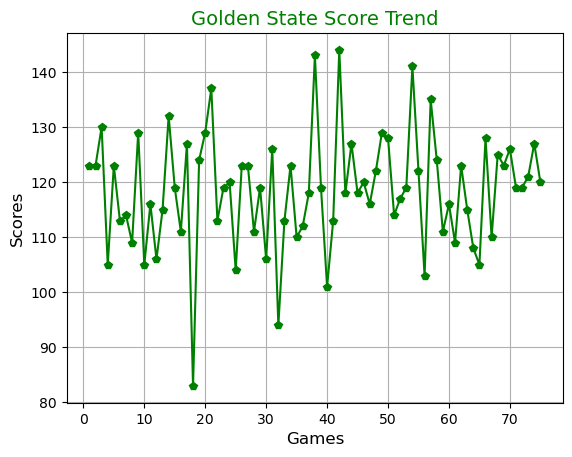

In [521]:
#GSW score Trend
print("TRENDS")
fig, ax = plt.subplots()
ax.plot(gs.Tm, marker='p', color='green')
ax.grid(True)
ax.set_title("Golden State Score Trend", color='green', fontsize=14)
ax.set_xlabel("Games", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
plt.show()

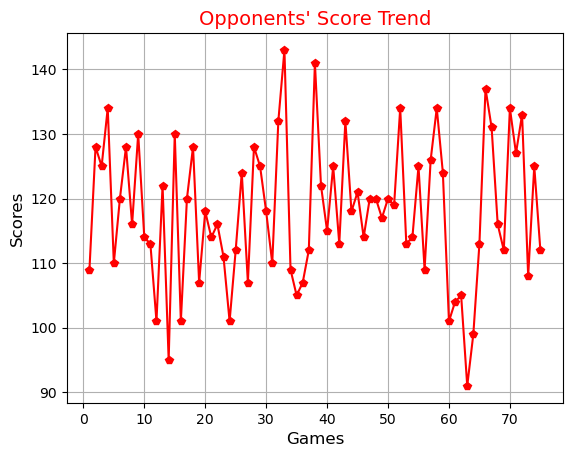

In [522]:
#Losing Trend
fig, ax = plt.subplots()
ax.plot(gs.Opp, marker='p', color='red')
ax.grid(True)
ax.set_title("Opponents' Score Trend", color='red', fontsize=14)
ax.set_xlabel("Games", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
plt.show()

**


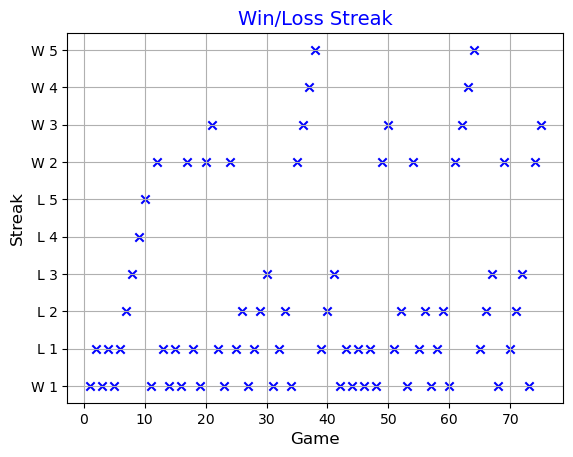

In [523]:
#Streak vs Result
print('**')
fig, ax = plt.subplots()
ax.scatter(gs.index, gs.Streak, marker='x', color='blue')
ax.set_title("Win/Loss Streak", fontsize=14, color='blue')
ax.set_xlabel("Game", fontsize=12)
ax.set_ylabel("Streak", fontsize=12)
plt.grid(True)
plt.show()

In [524]:
#homeVSaway
print('HOME/AWAY')
print("Biggest Range, Home:")
gsc[gsc['where']=='home'].sort_values('g_range', ascending=False).head()

HOME/AWAY
Biggest Range, Home:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
14,2022-11-14,10:00p,home,San Antonio Spurs,W,NoOT,132,95,6,8,W 1,37
54,2023-02-06,10:00p,home,Oklahoma City Thunder,W,NoOT,141,114,28,26,W 2,27
63,2023-03-02,10:00p,home,Los Angeles Clippers,W,NoOT,115,91,33,30,W 4,24
24,2022-12-03,8:30p,home,Houston Rockets,W,NoOT,120,101,13,11,W 2,19
62,2023-02-28,10:00p,home,Portland Trail Blazers,W,NoOT,123,105,32,30,W 3,18


In [525]:
print("Biggest Range, Away:")
gsc[gsc['where']=='away'].sort_values('g_range', ascending=False).head()

Biggest Range, Away:


,Date,Start (ET),where,Opponent,result,PlayTime(OT),Tm,Opp,W,L,Streak,g_range
G,,,,,,,,,,,,
18,2022-11-21,8:00p,away,New Orleans Pelicans,L,NoOT,83,128,8,10,L 1,45
32,2022-12-20,7:30p,away,New York Knicks,L,NoOT,94,132,15,17,L 1,38
42,2023-01-13,7:30p,away,San Antonio Spurs,W,NoOT,144,113,21,21,W 1,31
33,2022-12-21,7:30p,away,Brooklyn Nets,L,NoOT,113,143,15,18,L 2,30
4,2022-10-25,10:00p,away,Phoenix Suns,L,NoOT,105,134,2,2,L 1,29


In [526]:
gsWH=pd.DataFrame(gs[gs["where"]=='home']['result'])
print(f"Total Home Games: {gsWH.size}")
gsWA=pd.DataFrame(gs[gs["where"]=='away']['result'])
print(f"Total Away Games: {gsWA.size}")
print(f"Home games won: {gsWH[gsWH['result']=='W'].count()}")
print(f"Home games lost: {gsWH[gsWH['result']=='L'].count()}")
print(f"Away games won: {gsWA[gsWA['result']=='W'].count()}")
print(f"Away games lost: {gsWA[gsWA['result']=='L'].count()}")

Total Home Games: 37
Total Away Games: 38
Home games won: result    30
dtype: int64
Home games lost: result    7
dtype: int64
Away games won: result    9
dtype: int64
Away games lost: result    29
dtype: int64


COMPARISONS


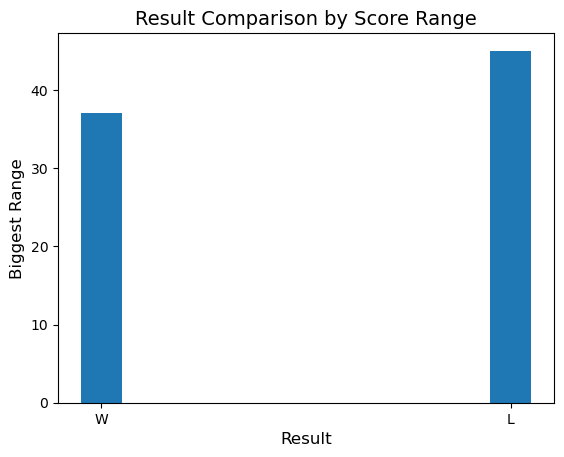

In [527]:
#goal range difference
print("COMPARISONS")
fig, ax = plt.subplots()
ax.bar(gs.result, gs['g_range'], width=0.1)
ax.set_title("Result Comparison by Score Range", fontsize=14)
ax.set_xlabel("Result", fontsize=12)
ax.set_ylabel("Biggest Range", fontsize=12)
plt.show()

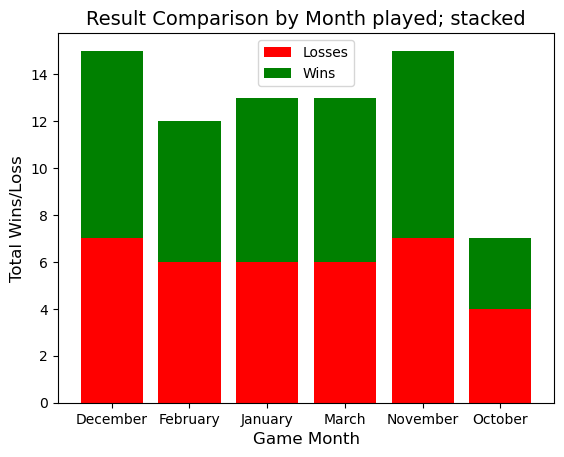

Date,December,February,January,March,November,October
Won,8,6,7,7,8,3
Lost,7,6,6,6,7,4


In [528]:
#Months performance 
WinsPerMon=gs.groupby(gs['Date'].sort_values().dt.month_name())['wint'].sum()
LossPerMon=gs.groupby(gs['Date'].sort_values().dt.month_name())['Losst'].sum()
#print(f"won: {WinsPerMon}")
#print(f"Lost: {LossPerMon}")
fig, ax = plt.subplots()
ax.bar(WinsPerMon.index, LossPerMon, color='red', label='Losses')
ax.bar(WinsPerMon.index, WinsPerMon, bottom=LossPerMon, color='green', label='Wins')
ax.set_title("Result Comparison by Month played; stacked", fontsize=14)
ax.set_xlabel("Game Month", fontsize=12)
ax.set_ylabel("Total Wins/Loss", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([WinsPerMon, LossPerMon], index=['Won', 'Lost'])

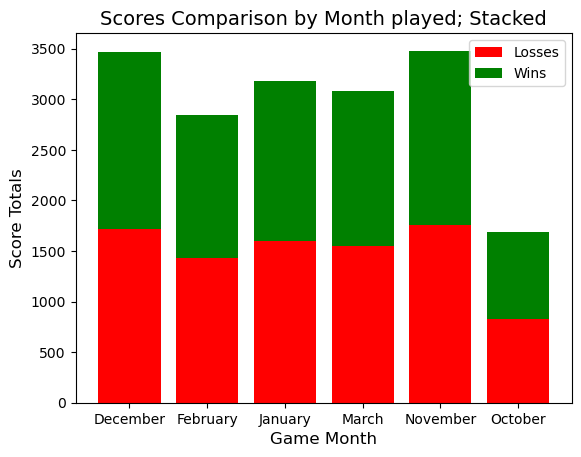

Date,December,February,January,March,November,October
GSW,1744,1408,1578,1538,1725,854
OPP,1721,1434,1598,1546,1755,831


In [529]:
LossScorem=gs.groupby(gs['Date'].dt.month_name())['Tm'].sum()
WinsScorem=gs.groupby(gs['Date'].dt.month_name())['Opp'].sum()
fig, ax = plt.subplots()
ax.bar(WinsPerMon.index, LossScorem, color='red', label='Losses')
ax.bar(WinsPerMon.index, WinsScorem, bottom=LossScorem, color='green', label='Wins')
ax.set_title("Scores Comparison by Month played; Stacked", fontsize=14)
ax.set_xlabel("Game Month", fontsize=12)
ax.set_ylabel("Score Totals", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([WinsScorem, LossScorem], index=['GSW', 'OPP'])

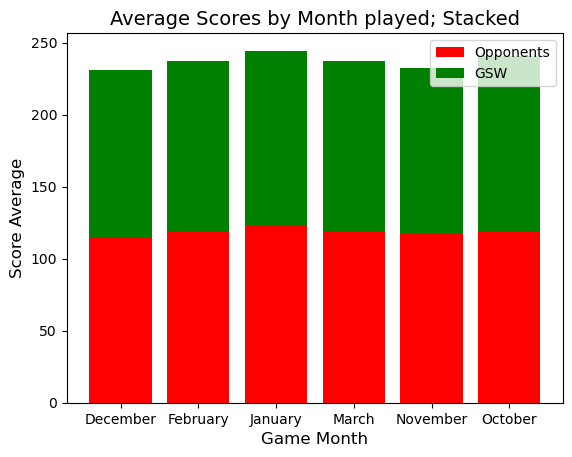

Date,December,February,January,March,November,October
GSW,116.266667,117.333333,121.384615,118.307692,115.0,122.000000
OPP,114.733333,119.500000,122.923077,118.923077,117.0,118.714286


In [530]:
meanWm=WinsScorem/(WinsPerMon+LossPerMon)
meanLm=LossScorem/(WinsPerMon+LossPerMon)
fig, ax = plt.subplots()
ax.bar(WinsPerMon.index, meanLm, color='red', label='Opponents')
ax.bar(WinsPerMon.index, meanWm, bottom=meanLm, color='green', label='GSW')
ax.set_title("Average Scores by Month played; Stacked", fontsize=14)
ax.set_xlabel("Game Month", fontsize=12)
ax.set_ylabel("Score Average", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([meanWm, meanLm], index=['GSW', 'OPP'])

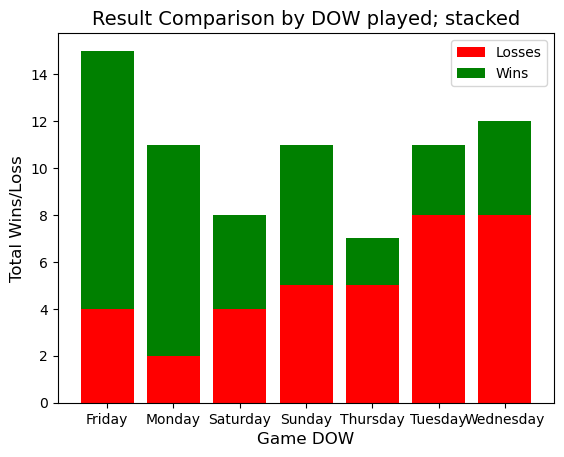

Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Won,11,9,4,6,2,3,4
Lost,4,2,4,5,5,8,8


In [531]:
#Game Day Comparison

WinsPerDay=gs.groupby(gs['Date'].dt.day_name())['wint'].sum()
LossPerDay=gs.groupby(gs['Date'].dt.day_name())['Losst'].sum()
fig, ax = plt.subplots()
ax.bar(WinsPerDay.index, LossPerDay, color='red', label='Losses')
ax.bar(WinsPerDay.index, WinsPerDay, bottom=LossPerDay, color='green', label='Wins')
ax.set_title("Result Comparison by DOW played; stacked", fontsize=14)
ax.set_xlabel("Game DOW", fontsize=12)
ax.set_ylabel("Total Wins/Loss", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([WinsPerDay, LossPerDay], index=['Won', 'Lost'])

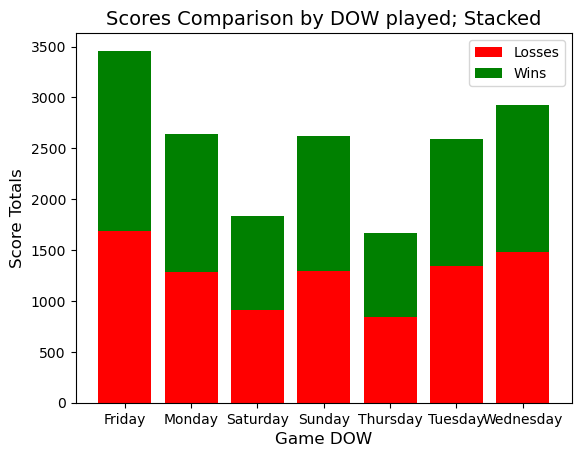

Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
GSW,1773,1353,923,1320,823,1253,1440
OPP,1686,1287,914,1297,841,1341,1481


In [532]:
LossScoredd=gs.groupby(gs['Date'].dt.day_name())['Opp'].sum()
WinsScoredd=gs.groupby(gs['Date'].dt.day_name())['Tm'].sum()
fig, ax = plt.subplots()
ax.bar(WinsPerDay.index, LossScoredd, color='red', label='Losses')
ax.bar(WinsPerDay.index, WinsScoredd, bottom=LossScoredd, color='green', label='Wins')
ax.set_title("Scores Comparison by DOW played; Stacked", fontsize=14)
ax.set_xlabel("Game DOW", fontsize=12)
ax.set_ylabel("Score Totals", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([WinsScoredd, LossScoredd], index=['GSW', 'OPP'])

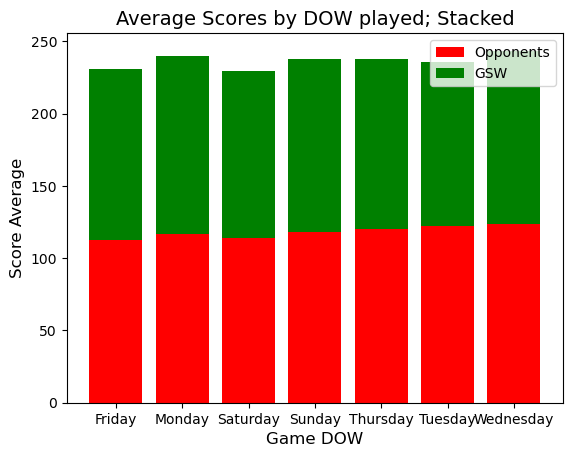

Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
GSW,118.2,123.0,115.375,120.000000,117.571429,113.909091,120.000000
OPP,112.4,117.0,114.250,117.909091,120.142857,121.909091,123.416667


In [533]:
meanWdd=WinsScoredd/(WinsPerDay+LossPerDay)
meanLdd=LossScoredd/(WinsPerDay+LossPerDay)
fig, ax = plt.subplots()
ax.bar(WinsPerDay.index, meanLdd, color='red', label='Opponents')
ax.bar(WinsPerDay.index, meanWdd, bottom=meanLdd, color='green', label='GSW')
ax.set_title("Average Scores by DOW played; Stacked", fontsize=14)
ax.set_xlabel("Game DOW", fontsize=12)
ax.set_ylabel("Score Average", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([meanWdd, meanLdd], index=['GSW', 'OPP'])

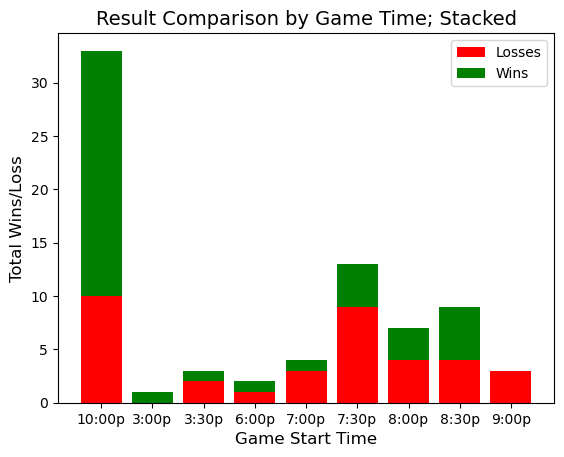

Start (ET),10:00p,3:00p,3:30p,6:00p,7:00p,7:30p,8:00p,8:30p,9:00p
Won,23,1,1,1,1,4,3,5,0
Lost,10,0,2,1,3,9,4,4,3


In [534]:
WinsPerHr=gs.groupby('Start (ET)')['wint'].sum()
LossPerHr=gs.groupby('Start (ET)')['Losst'].sum()
fig, ax = plt.subplots()
ax.bar(WinsPerHr.index, LossPerHr, color='red', label='Losses')
ax.bar(WinsPerHr.index, WinsPerHr, bottom=LossPerHr, color='green', label='Wins')
ax.set_title("Result Comparison by Game Time; Stacked", fontsize=14)
ax.set_xlabel("Game Start Time", fontsize=12)
ax.set_ylabel("Total Wins/Loss", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([WinsPerHr, LossPerHr], index=['Won', 'Lost'])

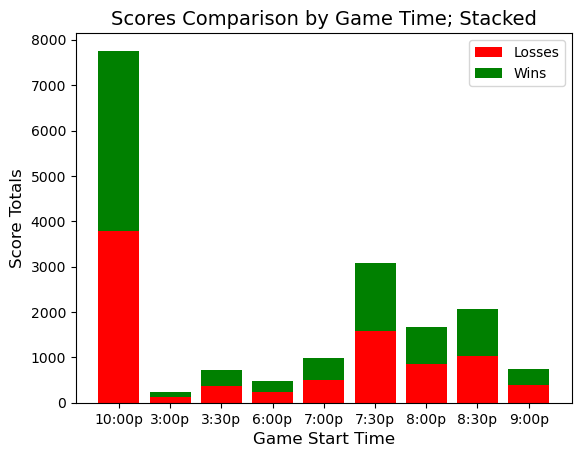

Start (ET),10:00p,3:00p,3:30p,6:00p,7:00p,7:30p,8:00p,8:30p,9:00p
GSW,3964,127,360,240,488,1493,816,1042,355
OPP,3795,118,359,238,495,1588,854,1020,380


In [535]:
LossScoreh=gs.groupby('Start (ET)')['Opp'].sum()
WinsScoreh=gs.groupby('Start (ET)')['Tm'].sum()
fig, ax = plt.subplots()
ax.bar(WinsPerHr.index, LossScoreh, color='red', label='Losses')
ax.bar(WinsPerHr.index, WinsScoreh, bottom=LossScoreh, color='green', label='Wins')
ax.set_title("Scores Comparison by Game Time; Stacked", fontsize=14)
ax.set_xlabel("Game Start Time", fontsize=12)
ax.set_ylabel("Score Totals", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([WinsScoreh, LossScoreh], index=['GSW', 'OPP'])

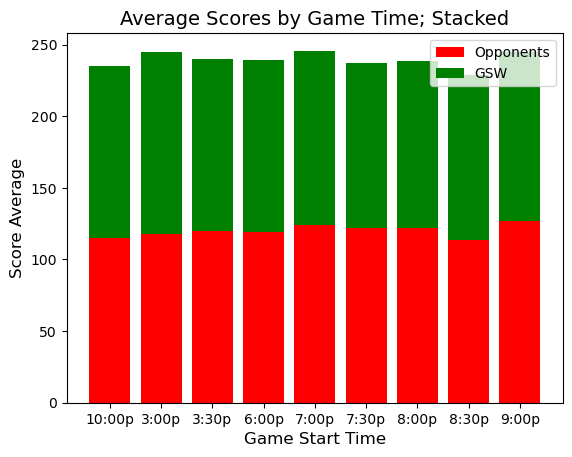

Start (ET),10:00p,3:00p,3:30p,6:00p,7:00p,7:30p,8:00p,8:30p,9:00p
GSW,120.121212,127.0,120.000000,120.0,122.00,114.846154,116.571429,115.777778,118.333333
OPP,115.000000,118.0,119.666667,119.0,123.75,122.153846,122.000000,113.333333,126.666667


In [536]:
meanWHr=WinsScoreh/(WinsPerHr+LossPerHr)
meanLHr=LossScoreh/(WinsPerHr+LossPerHr)
fig, ax = plt.subplots()
ax.bar(WinsPerHr.index, meanLHr, color='red', label='Opponents')
ax.bar(WinsPerHr.index, meanWHr, bottom=meanLHr, color='green', label='GSW')
ax.set_title("Average Scores by Game Time; Stacked", fontsize=14)
ax.set_xlabel("Game Start Time", fontsize=12)
ax.set_ylabel("Score Average", fontsize=12)
ax.legend()
plt.show()
pd.DataFrame([meanWHr, meanLHr], index=['GSW', 'OPP'])

In [537]:
Month_Average_Res=pd.DataFrame((WinsPerMon/(LossPerMon+WinsPerMon))*100)
Day_Average_Res=pd.DataFrame((WinsPerDay/(LossPerDay+WinsPerDay))*100)
Hr_Average_Res=pd.DataFrame((WinsPerHr/(LossPerHr+WinsPerHr))*100)

WIN RATIO


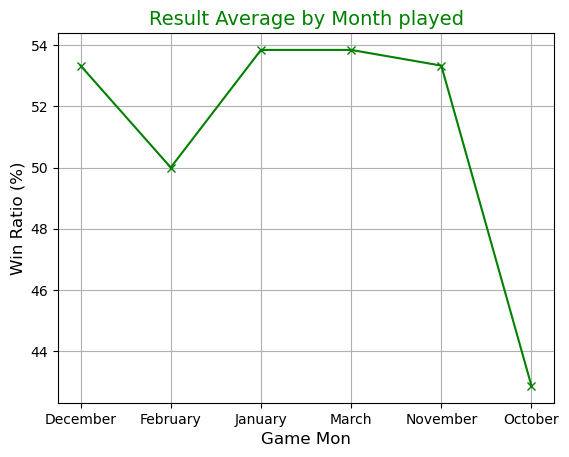

Date,December,February,January,March,November,October
0,53.333333,50.0,53.846154,53.846154,53.333333,42.857143


In [538]:
#Monthly Win Ratio
print("WIN RATIO")
fig, ax = plt.subplots()
ax.plot(Month_Average_Res.index, Month_Average_Res, color='green', marker='x')
ax.set_title("Result Average by Month played", fontsize=14, color='green')
ax.set_xlabel("Game Mon", fontsize=12)
ax.set_ylabel("Win Ratio (%)", fontsize=12)
plt.grid()
plt.show()
pd.DataFrame(Month_Average_Res).T

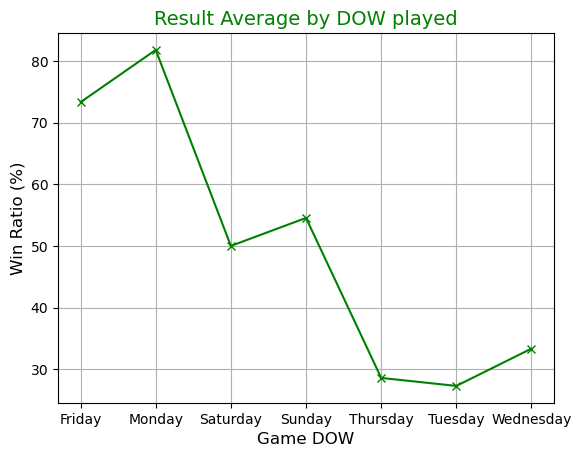

Date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,73.333333,81.818182,50.0,54.545455,28.571429,27.272727,33.333333


In [539]:
#Day Win Ratio
fig, ax = plt.subplots()
ax.plot(Day_Average_Res.index, Day_Average_Res, color='green', marker='x')
ax.set_title("Result Average by DOW played", fontsize=14, color='green')
ax.set_xlabel("Game DOW", fontsize=12)
ax.set_ylabel("Win Ratio (%)", fontsize=12)
plt.grid()
plt.show()
pd.DataFrame(Day_Average_Res).T

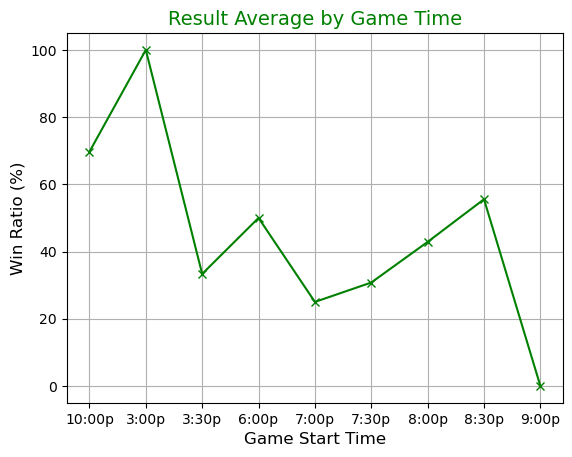

Start (ET),10:00p,3:00p,3:30p,6:00p,7:00p,7:30p,8:00p,8:30p,9:00p
0,69.69697,100.0,33.333333,50.0,25.0,30.769231,42.857143,55.555556,0.0


In [545]:
#Hour Win Ratio
fig, ax = plt.subplots()
ax.plot(Hr_Average_Res.index, Hr_Average_Res, color='green', marker='x')
ax.set_title("Result Average by Game Time", fontsize=14, color='green')
ax.set_xlabel("Game Start Time", fontsize=12)
ax.set_ylabel("Win Ratio (%)", fontsize=12)
plt.grid()
plt.show()
pd.DataFrame(Hr_Average_Res).T

In [ ]:
gs.head()